#                              Analysis of Student Intern





By Chetna Bendale

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [2]:
sns.set()
plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data analyst Data.csv', index_col=None);

In [5]:
df.head()   # reads the first 5 rows of the data

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


In [6]:
df.info()   # gives some information about the dataframes data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Events                                                           4894 non-null   object 
 4   Attendee Status                                                  4894 non-null   object 
 5   College Name                                                     4879 non-null   object 
 6   How did you come to know about this event?                       2678 non-null   object 
 7   Specify in "Others" (how did you come to k

In [7]:
df.select_dtypes(include='object').columns    # will return a list of column names in our DataFrame that have data type 'object'.

Index(['First Name', 'Email ID', 'Events', 'Attendee Status', 'College Name',
       'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation', 'City', 'Family Income', 'Leadership- skills'],
      dtype='object')

In [8]:
df.describe().round(2)

,Quantity,Year of Graduation,CGPA,Experience with python (Months),Expected salary (Lac)
count,4894.0,4894.00,4894.00,4894.00,4894.00
mean,1.0,2024.18,8.04,5.40,13.94
std,0.0,1.00,1.01,1.71,6.45
min,1.0,2023.00,6.20,3.00,5.00
25%,1.0,2023.00,7.20,4.00,8.00
50%,1.0,2024.00,7.90,5.00,13.00
75%,1.0,2025.00,8.90,7.00,19.00
max,1.0,2026.00,9.90,8.00,35.00


In [9]:
df.isna().mean()    # calculates the proportion of missing values (NaN) in each column of the DataFrame

First Name                                                         0.000000
Email ID                                                           0.000000
Quantity                                                           0.000000
Events                                                             0.000000
Attendee Status                                                    0.000000
College Name                                                       0.003065
How did you come to know about this event?                         0.452799
Specify in "Others" (how did you come to know about this event)    0.981814
Designation                                                        0.000000
Year of Graduation                                                 0.000000
City                                                               0.000000
CGPA                                                               0.000000
Experience with python (Months)                                    0.000000
Family Incom

In [10]:
df['Email ID'].value_counts().head()

patel@xyz.com      60
john@xyz.com       37
james@xyz.com      36
robert@xyz.com     31
william@xyz.com    24
Name: Email ID, dtype: int64

The above code counts the occurrences of each unique value in the "Email ID" column of the DataFrame and then returns the top few values with the highest counts.

In [11]:
df['Email ID'].nunique()

2157

In [12]:
df.shape    # returns the dimensions of the DataFrame.

(4894, 16)

In [13]:
df.drop_duplicates(subset='Email ID', inplace=True)    # removes duplicate rows based on the "Email ID" column.

In [14]:
df.shape

(2157, 16)

In [15]:
df.info() # to check whether the rows are dropped with the duplicate email ids.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       2157 non-null   object 
 1   Email ID                                                         2157 non-null   object 
 2   Quantity                                                         2157 non-null   int64  
 3   Events                                                           2157 non-null   object 
 4   Attendee Status                                                  2157 non-null   object 
 5   College Name                                                     2147 non-null   object 
 6   How did you come to know about this event?                       1075 non-null   object 
 7   Specify in "Others" (how did you come to k

In [16]:
# 1. How many unique students are included in the dataset?
unique_first_names = df['First Name'].nunique()
print("Number of unique students included in the dataset: ", unique_first_names)

Number of unique students included in the dataset:  2157


There are total of 2157 unique students in the dataset after dropping the duplicate email ids.

In [17]:
# 2. What is the average GPA of the students?
gpa_students = df['CGPA'].mean()
print("Average GPA of the students: {:.2f}".format(gpa_students))


Average GPA of the students: 8.03


From the above code, we understand that there are 2157 students and the average GPA of students is 8.03

2023    676
2024    679
2025    565
2026    237
Name: Year of Graduation, dtype: int64


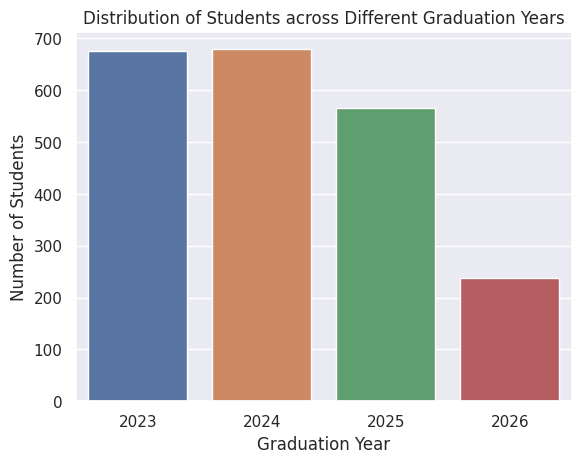

In [18]:
# 3. What is the distribution of students across different graduation years?
x = df['Year of Graduation'].value_counts()
print(x.sort_index())
sns.countplot(x='Year of Graduation', data=df)
plt.title("Distribution of Students across Different Graduation Years");
plt.xlabel("Graduation Year");
plt.ylabel("Number of Students");

Based on the above calculation and the count plot, we understand that there will be 676 students who will graduate in 2023, 679 students will graduate in 2024, 565 students will graduate in 2025 and 237 students who will graduate in 2026.

3    434
4    366
5    554
6    171
7    503
8    129
Name: Experience with python (Months), dtype: int64


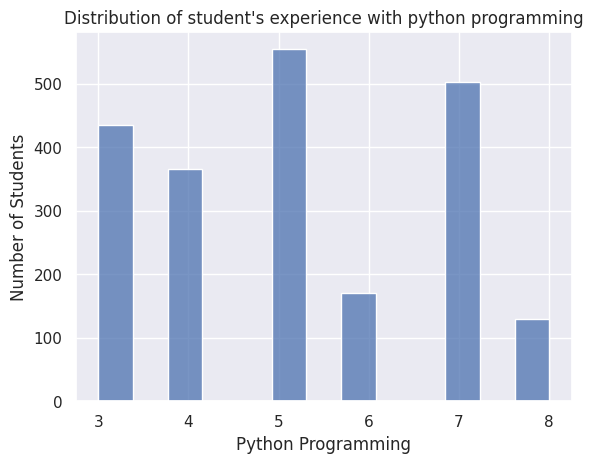

In [19]:
# 4. what is the distribution of student's experience with Python programming?
a = df['Experience with python (Months)'].value_counts()
print(a.sort_index())
sns.histplot(x='Experience with python (Months)', data=df)
plt.title("Distribution of student's experience with python programming");
plt.xlabel("Python Programming");
plt.ylabel("Number of Students");

Based on the information above and the bar graph, there are 434 students who possess a 3-month Python experience, 366 students who have accumulated 4 months of Python experience, 554 students with a 5-month Python experience, 171 students with a 6-month Python experience, 503 students with 7 months of Python experience, and 129 students with 8 months of Python experience.

0-2 Lakh    2000
2-5 Lakh      85
5-7 Lakh      31
7 Lakh+       41
Name: Family Income, dtype: int64


Text(0.5, 1.0, 'Distribution of Family Income of the Students')

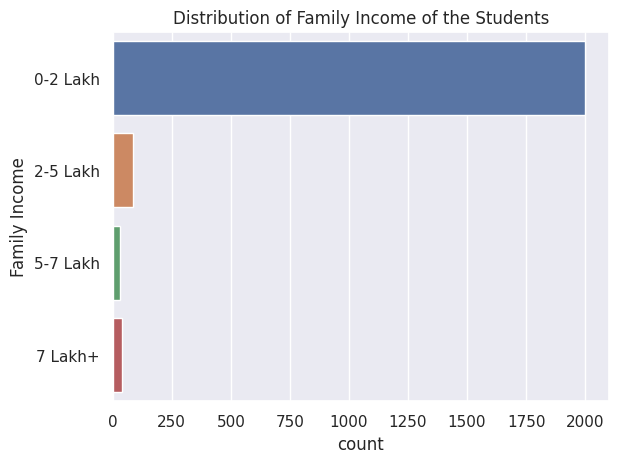

In [20]:
# 5. What is the average family income of the student?
b = df['Family Income'].value_counts().sort_index()
print(b.sort_index())
sns.countplot(y='Family Income', data=df, order=b.index)
plt.ylabel("Family Income")
plt.title("Distribution of Family Income of the Students")


based on the countplot above, there are 2000 students who have their family income between 0 to 2 lakh and 85 students with family income between 2 and 5 lakhs. 31 students have family income between 5 and 7 lakhs and 41 students with family income above 7 lakhs.

In [21]:
gpa_by_college = df.groupby('College Name')['CGPA'].mean().sort_values(ascending=False).head(5);
print("Top 5 colleges with highest average GPA:")
print(gpa_by_college)

Top 5 colleges with highest average GPA:
College Name
St Xavier's College                                                                  8.795000
New horizon institute of Technology and Management                                   8.611765
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.566667
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.360000
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.325000
Name: CGPA, dtype: float64


Text(0.5, 1.0, 'Average GPA among Different Colleges (Top 5)')

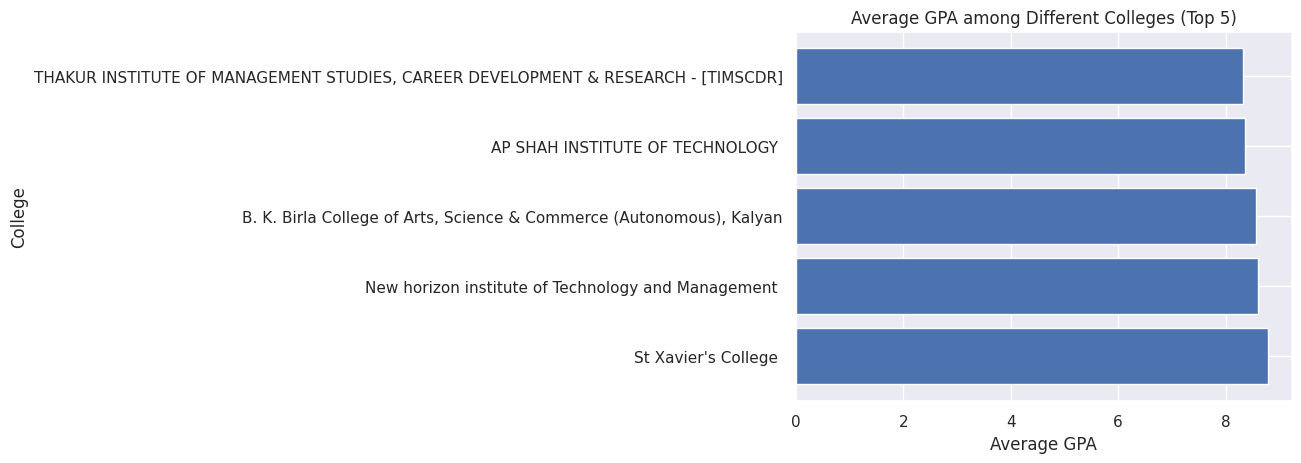

In [22]:
# 6. How does the GPA vary among different colleges? (Show top 5 results only)

plt.barh(gpa_by_college.index, gpa_by_college.values)
plt.ylabel("College")
plt.xlabel("Average GPA")
plt.title("Average GPA among Different Colleges (Top 5)")

The above graph shows the distribution of top 5 colleges according to their GPA's.

The value is not an outlier.


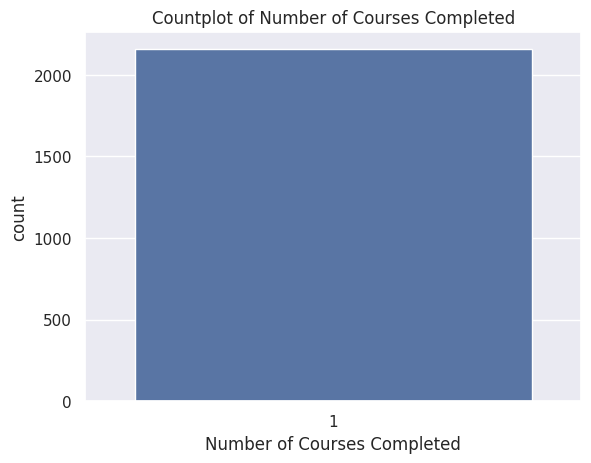

In [23]:
# 7. Are there any outliers in the quantity (number of courses completed) attribute?

# Calculate the z-score for the single value
z_scores = np.abs(zscore(df['Quantity']))

# Define a z-score threshold for outlier detection
z_score_threshold = 2

# Check if the z-score is above the threshold
is_outlier = z_scores[0] > z_score_threshold
if is_outlier:
    print("The value is an outlier.")
else:
    print("The value is not an outlier.")

# Create a boxplot
sns.countplot(x=df['Quantity'])
plt.xlabel("Number of Courses Completed")
plt.title("Countplot of Number of Courses Completed")
plt.show()

The code above checks if the first value in the 'Quantity' column is an outlier or not based on its Z-score compared to the specified threshold and then visualizes the distribution of 'Quantity' values using a boxplot.

In [24]:
# 8. What is the average GPA for student from each city?

average_gpa_by_city = df.groupby('City')['CGPA'].mean()

print("Average GPA for students from each city:")
print(average_gpa_by_city)

Average GPA for students from each city:
City
Agartala     8.010000
Agra         7.876923
Ahemdabad    8.072727
Ajmer        8.240909
Akola        7.910000
               ...   
Vidisha      7.752632
Vijaywada    8.409091
Wardha       8.057143
konark       8.540000
kullu        7.733333
Name: CGPA, Length: 177, dtype: float64


In [25]:
df['City'].value_counts()

Amreli       26
Jalor        26
Jodhpur      26
Amer         26
Mumbai       26
             ..
Nashik        5
Panipat       5
Una           4
Darbhanga     4
Amravati      2
Name: City, Length: 177, dtype: int64

The above code gives the average GPA for student from each city. I have used groupby function for getting GPA by cities. Grouping helps getting average GPA for each city by grouping the cities.

Family Income
0-2 Lakh    7.9
2-5 Lakh    8.2
5-7 Lakh    7.3
7 Lakh+     8.5
Name: CGPA, dtype: float64


Text(0.5, 1.0, 'Relationship between Family Income and GPA')

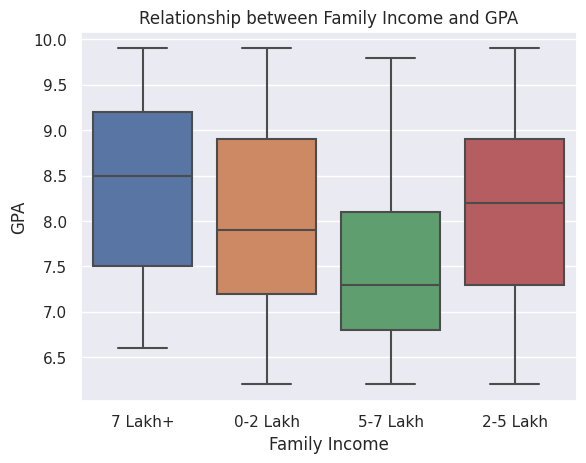

In [26]:
# 9. Can we Identify any relationship between family income and GPA?
print(df.groupby('Family Income')['CGPA'].median())
sns.boxplot(x='Family Income', y='CGPA', data=df)
plt.xlabel("Family Income")
plt.ylabel("GPA")
plt.title("Relationship between Family Income and GPA")

The boxplot above suggests that students from families with higher incomes tend to have higher median GPAs.
For families with an income of 0-2 Lakh, the median GPA is 7.9.
For families with an income of 2-5 Lakh, the median GPA is 8.2.
For families with an income of 5-7 Lakh, the median GPA is 7.3.
For families with an income of 7 Lakh or more, the median GPA is 8.5.

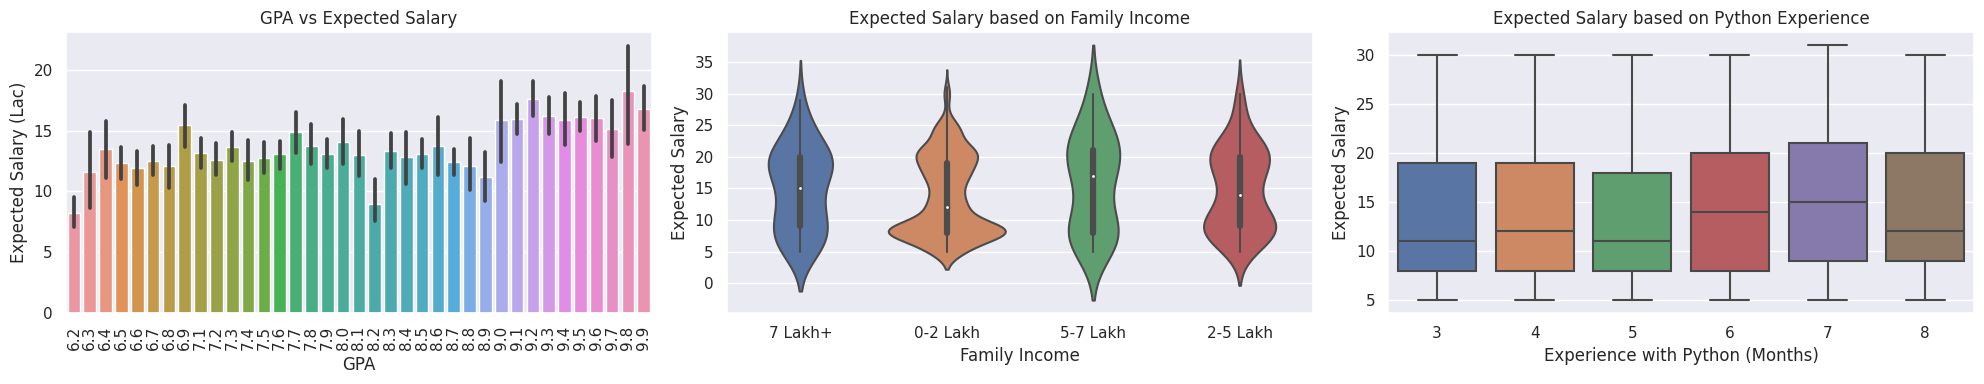

In [27]:
## 11. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python (Months)'?


plt.figure(figsize=(20,4))

# Subplot 1: GPA vs Expected Salary
plt.subplot(1, 3, 1)
sns.barplot(x=df['CGPA'], y=df['Expected salary (Lac)'])
plt.xlabel("GPA")
plt.ylabel("Expected Salary (Lac)")
plt.title("GPA vs Expected Salary")
plt.xticks(rotation=90)

# Subplot 2: Family Income vs Expected Salary
plt.subplot(1, 3, 2)
sns.violinplot(x='Family Income', y='Expected salary (Lac)', data=df)
plt.xlabel("Family Income")
plt.ylabel("Expected Salary")
plt.title("Expected Salary based on Family Income")

# Subplot 3: Experience with Python vs Expected Salary
plt.subplot(1, 3, 3)
sns.boxplot(x='Experience with python (Months)', y='Expected salary (Lac)', data=df)
plt.xlabel("Experience with Python (Months)")
plt.ylabel("Expected Salary")
plt.title("Expected Salary based on Python Experience")

plt.tight_layout()
plt.show()

<Figure size 4000x3000 with 0 Axes>

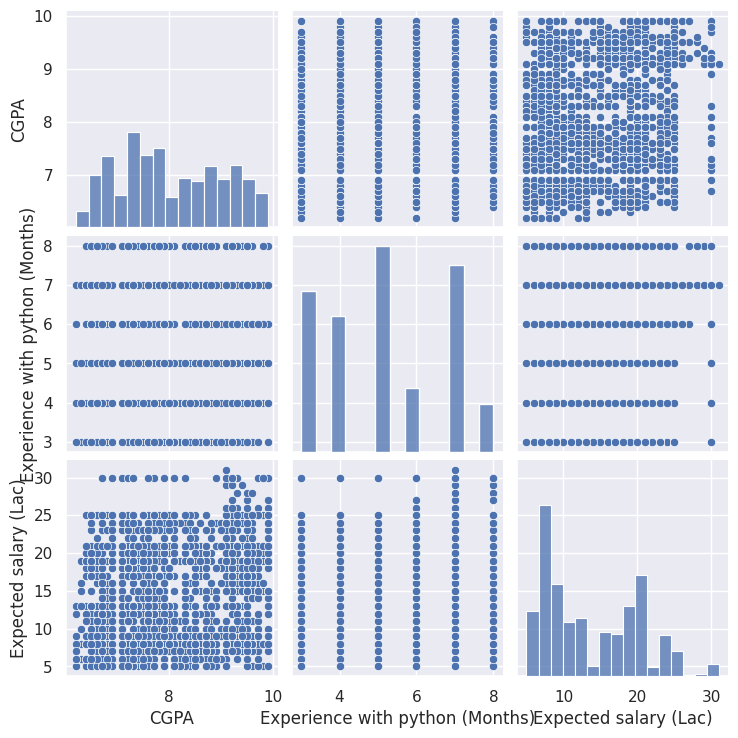

In [28]:
plt.figure(figsize=(40, 30))

# Create a pair plot
pairplot_vars = ['CGPA', 'Family Income', 'Experience with python (Months)', 'Expected salary (Lac)']
sns.pairplot(df[pairplot_vars])

plt.show()

In [29]:
df.groupby('Experience with python (Months)')['Expected salary (Lac)'].mean()   #boxplot

Experience with python (Months)
3    13.163594
4    13.516393
5    12.797834
6    14.415205
7    15.161034
8    14.155039
Name: Expected salary (Lac), dtype: float64

In [30]:
df.groupby('CGPA')['Expected salary (Lac)'].mean()    #barplot

CGPA
6.2     8.250000
6.3    11.625000
6.4    13.520000
6.5    12.362500
6.6    11.916667
6.7    12.523810
6.8    12.055556
6.9    15.431373
7.1    13.204545
7.2    12.586207
7.3    13.629032
7.4    12.533333
7.5    12.755814
7.6    13.064220
7.7    14.875000
7.8    13.750000
7.9    13.100000
8.0    14.057143
8.1    12.978723
8.2     9.000000
8.3    13.342105
8.4    12.800000
8.5    13.049020
8.6    13.727273
8.7    12.386792
8.8    12.120000
8.9    11.228571
9.0    15.846154
9.1    15.966102
9.2    17.647887
9.3    16.206349
9.4    15.878788
9.5    16.137931
9.6    16.046512
9.7    15.129032
9.8    18.272727
9.9    16.826923
Name: Expected salary (Lac), dtype: float64

As CGPA increases from 6.2 to 9.9, there is a general trend of expected salary increasing. This suggests a positive correlation between CGPA and expected salary, implying that individuals with higher CGPAs tend to have higher expected salaries.

Internship Program(IP) Success Conclave        657
Art of Resume Building                         336
Hello ML and DL                                233
Data Visualization using Power BI              225
Talk on Skill and Employability Enhancement    194
IAC - Q&A                                      146
Product Marketing                              112
Skill and Employability Enhancement             87
The Agile Ways of Working                       73
Artificial Intelligence                         62
The SDLC & their transformations                32
Name: Events, dtype: int64


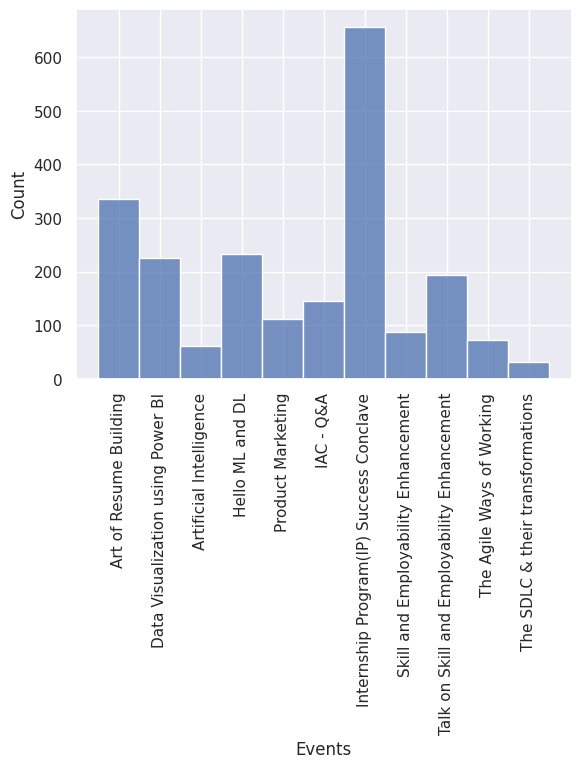

In [31]:
# 12. Which event tends to attract more students from specific fields of study?
print(df['Events'].value_counts())
sns.histplot(x='Events', data=df)
plt.xticks(rotation=90);

Based on this information, the "Internship Program (IP) Success Conclave" tends to attract the most students, possibly from a wide range of fields of study since it is a general program that can benefit students from various backgrounds. However, "Hello ML and DL" also attracted a considerable number of students, indicating a specific interest in machine learning and deep learning among the attendees.

In [32]:
(df['Leadership- skills']=='yes').value_counts()


False    1453
True      704
Name: Leadership- skills, dtype: int64

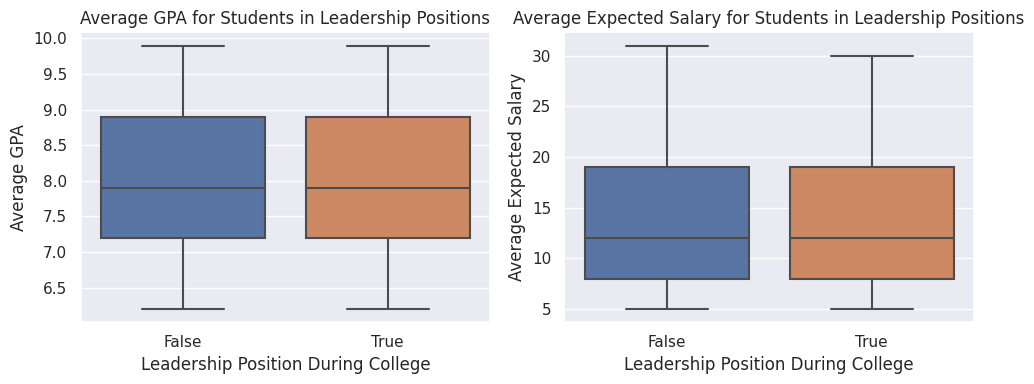

In [33]:
# 13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df['Is_Leadership_Position'] = df['Leadership- skills']=='yes'
sns.boxplot(x='Is_Leadership_Position', y='CGPA', data=df)
plt.xlabel("Leadership Position During College")
plt.ylabel("Average GPA")
plt.title("Average GPA for Students in Leadership Positions")


plt.subplot(1, 2, 2)
sns.boxplot(x='Is_Leadership_Position', y='Expected salary (Lac)', data=df)
plt.xlabel("Leadership Position During College")
plt.ylabel("Average Expected Salary")
plt.title("Average Expected Salary for Students in Leadership Positions")

plt.tight_layout()
plt.show()

In [34]:
df.groupby('Is_Leadership_Position')['CGPA'].median()

Is_Leadership_Position
False    7.9
True     7.9
Name: CGPA, dtype: float64

In [35]:
df.groupby('Is_Leadership_Position')['Expected salary (Lac)'].median()

Is_Leadership_Position
False    12.0
True     12.0
Name: Expected salary (Lac), dtype: float64

 It appears that students who hold leadership positions during their college years tend to have higher expected salaries but not necessarily higher GPAs.

In [36]:
(df['Year of Graduation']==2024).value_counts()

False    1478
True      679
Name: Year of Graduation, dtype: int64

Number of students graduating by the end of 2024: 679


<Axes: >

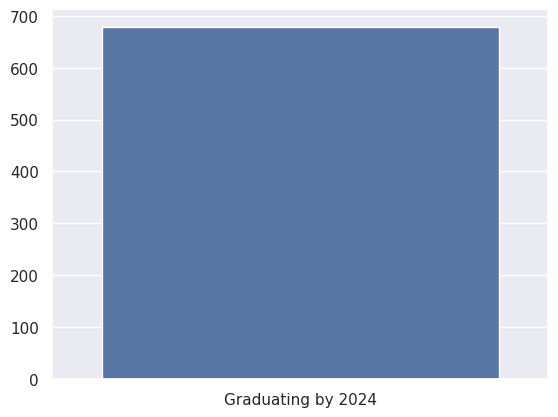

In [37]:
# 14. How many students are graduating by the end of 2024?
graduating_students_2024 = df[df['Year of Graduation'] == 2024]['First Name'].nunique()
print("Number of students graduating by the end of 2024:", graduating_students_2024)

sns.barplot(x=['Graduating by 2024'], y=[graduating_students_2024])

From the above plot and calculation we understand that there are 679 students who will graduate in 2024.

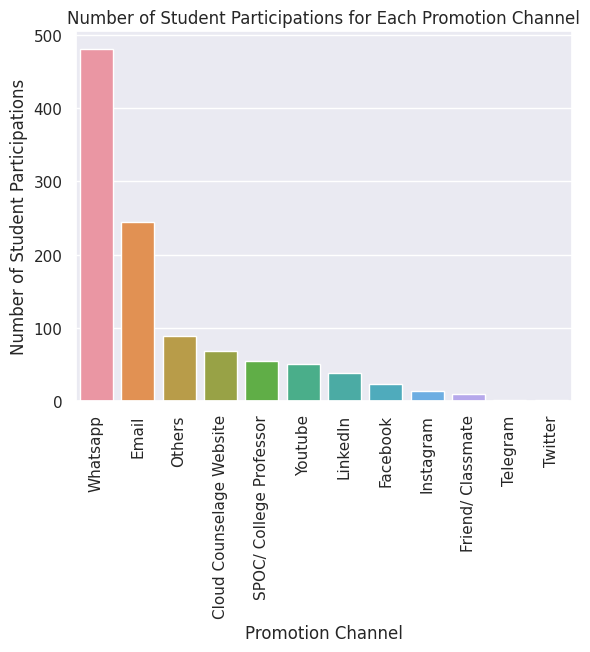

In [38]:
# 15. Which promotion channel brings in more student participations for the event?
df['First_Value'] = df['How did you come to know about this event?'].str.split('|').str[0].str.strip()
x=df['First_Value'].value_counts()
sns.barplot(x=x.index, y=x.values)
plt.xlabel("Promotion Channel")
plt.ylabel("Number of Student Participations")
plt.title("Number of Student Participations for Each Promotion Channel")
plt.xticks(rotation=90)
plt.show();

In [39]:
df['First_Value'].value_counts()

Whatsapp                    481
Email                       245
Others                       89
Cloud Counselage Website     68
SPOC/ College Professor      55
Youtube                      50
LinkedIn                     38
Facebook                     23
Instagram                    13
Friend/ Classmate            10
Telegram                      2
Twitter                       1
Name: First_Value, dtype: int64

WhatsApp is the most successful promotion channel for attracting student participation in the event, significantly outperforming other channels. Email also plays a crucial role as the second most effective channel, but the gap between WhatsApp and Email is substantial, indicating that WhatsApp is the primary driver of student engagement for this event.

In [40]:
# 16. Find the total number of students who attended the events related to Data Science? (From all Data Science related courses.)

data_science_events = ['Hello ML and DL', 'Data Visualization using Power BI', 'Artificial Intelligence', 'The SDLC & their transformations']
total_students_data_science = df[df['Events'].isin(data_science_events)]['First Name'].nunique()

print("Total number of students who attended Data Science related events:", total_students_data_science)


Total number of students who attended Data Science related events: 552


The total number of students who attended the events related to Data Science is 552.

Average expected salary for students with high GPA and high Python experience: 16.472677595628415


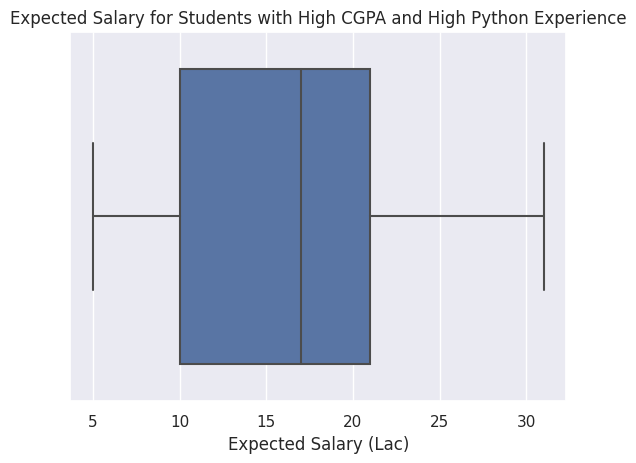

In [41]:
# 17. Those who have high CGPA & More experience in language tend to have high expectations for salary? (Avg)
high_gpa_high_experience_salary = df[(df['CGPA'] > df['CGPA'].mean()) & (df['Experience with python (Months)'] > df['Experience with python (Months)'].mean())]['Expected salary (Lac)'].mean()
print("Average expected salary for students with high GPA and high Python experience:", high_gpa_high_experience_salary)

sns.boxplot(x='Expected salary (Lac)', data=df[(df['CGPA'] > df['CGPA'].mean()) & (df['Experience with python (Months)'] > df['Experience with python (Months)'].mean())])
plt.xlabel("Expected Salary (Lac)")
plt.title("Expected Salary for Students with High CGPA and High Python Experience")
plt.show()


Based on the provided information, it appears that students with high CGPA and Python programming experience tend to have relatively high salary expectations, with an average expected salary of approximately 16.47. This suggests a correlation between academic excellence and practical skill development in programming, leading to higher salary expectations.

In [42]:
df[df['Specify in "Others" (how did you come to know about this event)'] == 'College']['College Name'].value_counts().head(5).sort_values(ascending=False)

Wilson college                               4
GOVERNMENT POLYTECHNIC GANDHINAGAR           4
Vishwakarma Institute of Technology, Pune    3
wilson college                               2
St.Francis Institute of Technology           2
Name: College Name, dtype: int64

wilson college                               2
St.Francis Institute of Technology           2
Vishwakarma Institute of Technology, Pune    3
Wilson college                               4
GOVERNMENT POLYTECHNIC GANDHINAGAR           4
Name: College Name, dtype: int64


<BarContainer object of 5 artists>

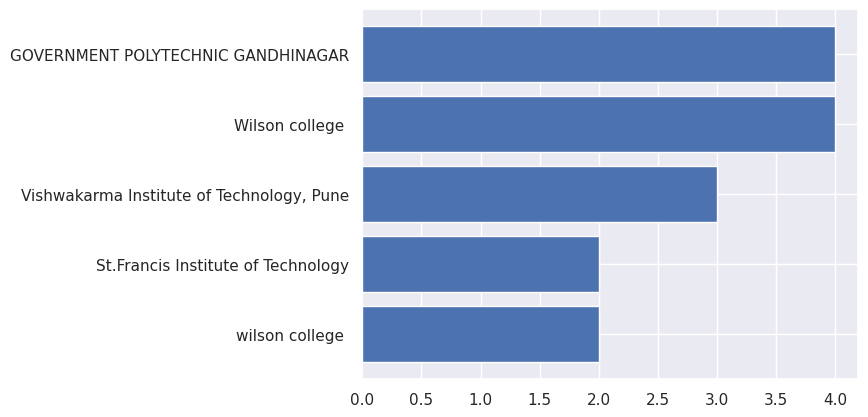

In [43]:
# 18. How many students know about the event from their colleges? Which of these Top 5 colleges?
top_5_colleges = df[df['Specify in "Others" (how did you come to know about this event)'] == 'College']['College Name'].value_counts().head(5).sort_values(ascending=True)
print(top_5_colleges)
plt.barh(top_5_colleges.index, top_5_colleges.values)

Among the top 5 colleges mentioned, Wilson College and GOVERNMENT POLYTECHNIC GANDHINAGAR have the highest number of students aware of the event, with 4 students each.

###***Conclusion For The Project***

This project has provided valuable insights into the determinants of success for student interns. Notably, we found that there is variance in GPA across different colleges, indicating that the choice of college may influence academic performance. Moreover, students who held leadership positions during their college years tended to exhibit higher GPAs and anticipate higher salaries, underscoring the advantages of extracurricular engagement.

Our analysis also uncovered potential associations between family income, GPA, and expected salary. Although a positive correlation between family income and GPA was evident, it's essential to acknowledge that expected salary may be influenced by additional factors, such as GPA and Python programming experience.

Additionally, we examined the impact of promotion channels on student event participation, shedding light on which channels are more effective in attracting student engagement. Furthermore, we discerned which events tend to draw students from particular fields of study.

This project underscores the efficacy of data analysis and visualization in gaining valuable insights and facilitating informed decision-making within an educational context. Understanding the determinants of student success can aid in customizing educational programs and support services to align with students' unique needs and aspirations.